### Doc 
- https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [17]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import pandas as pd
import numpy as np

from ML_loader import DatasetLoader,ModelLoader

In [18]:
#Get data 
loader = DatasetLoader()
loader.read_dataset('partial_database.csv',class_path='labelsDefault.txt',separator=',')
loader.split_dataset()

#Normalize data, if not already normalized
print(np.shape(loader.X_train),np.shape(loader.X_test),np.shape(loader.y_train),np.shape(loader.y_test))

(4048, 17) (1012, 17) (4048,) (1012,)


In [19]:
#Model
model=ModelLoader()
model.set_model(MLPClassifier(max_iter=300,hidden_layer_sizes=(100,100,100),random_state=1))

#Optimization 122min Optimal params {'max_iter': 300, 'hidden_layer_sizes': (100, 100, 100)}

"""
param = {'hidden_layer_sizes': [(100,100,100), (100,100,100,100,100), (100,100,100,100,100,100,100,100,100,100)],
              'max_iter':[300,500,1000]}
cv = RepeatedStratifiedKFold(n_splits=22, n_repeats=3, random_state=1)

model.set_optimal_params(param)

model.optimize(loader.X_train,loader.y_train,cv=cv,scoring='accuracy',n_iter=10)


#Train model with optimal params
model.set_model(MLPClassifier())
"""


"\nparam = {'hidden_layer_sizes': [(100,100,100), (100,100,100,100,100), (100,100,100,100,100,100,100,100,100,100)],\n              'max_iter':[300,500,1000]}\ncv = RepeatedStratifiedKFold(n_splits=22, n_repeats=3, random_state=1)\n\nmodel.set_optimal_params(param)\n\nmodel.optimize(loader.X_train,loader.y_train,cv=cv,scoring='accuracy',n_iter=10)\n\n\n#Train model with optimal params\nmodel.set_model(MLPClassifier())\n"

Partial fit


Score accuracy group 0:  0.6366459627329193
Score accuracy group learned 0:  0.6366459627329193
Score accuracy global:  0.20652173913043478
Memory:  279.841796875 MB
Partial fit
Score accuracy group 1:  0.0
Score accuracy group learned 0:  0.5031055900621118
Score accuracy group learned 1:  0.0
Score accuracy global:  0.16205533596837945
Memory:  279.1328125 MB
Partial fit
Score accuracy group 2:  0.16304347826086957
Score accuracy group learned 0:  0.17080745341614906
Score accuracy group learned 1:  0.44565217391304346
Score accuracy group learned 2:  0.16304347826086957
Score accuracy global:  0.1274703557312253
Memory:  257.0 MB
Partial fit
Score accuracy group 3:  0.0
Score accuracy group learned 0:  0.0
Score accuracy group learned 1:  0.44565217391304346
Score accuracy group learned 2:  0.47282608695652173
Score accuracy group learned 3:  0.0
Score accuracy global:  0.12055335968379446
Memory:  259.703125 MB
Partial fit
Score accuracy group 4:  0.0
Score accuracy group learned 0

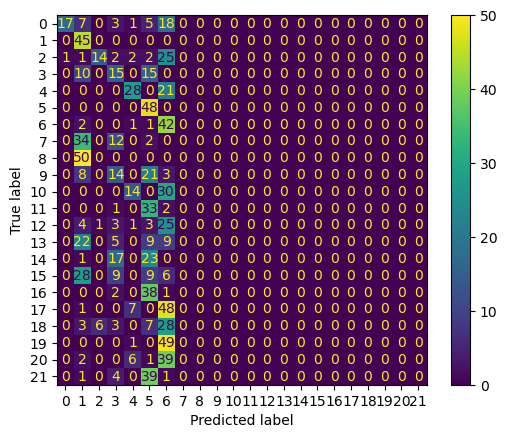

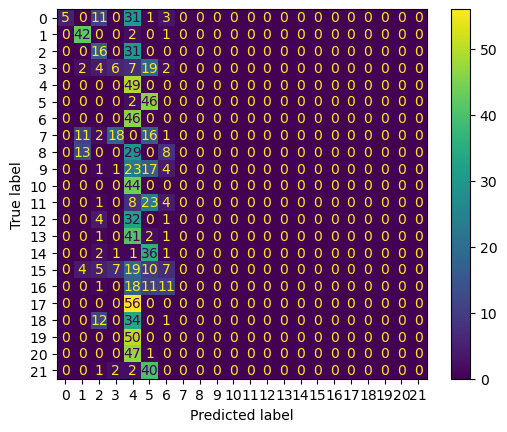

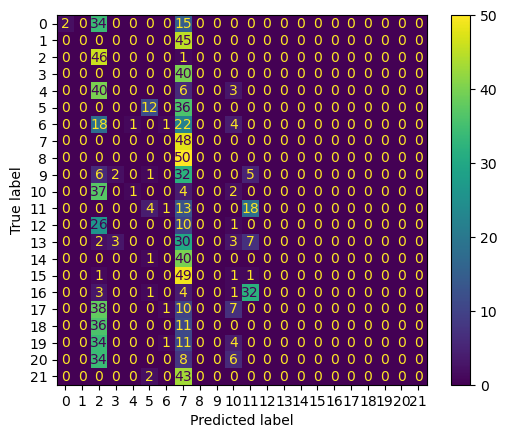

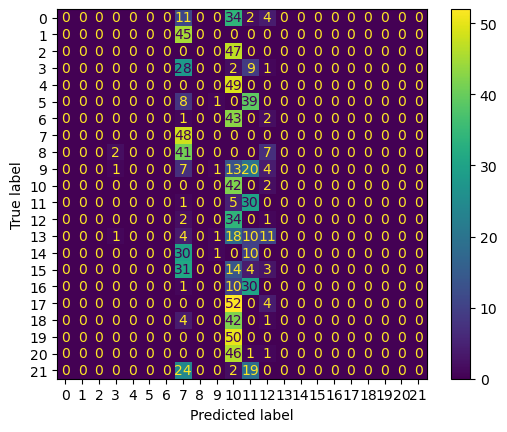

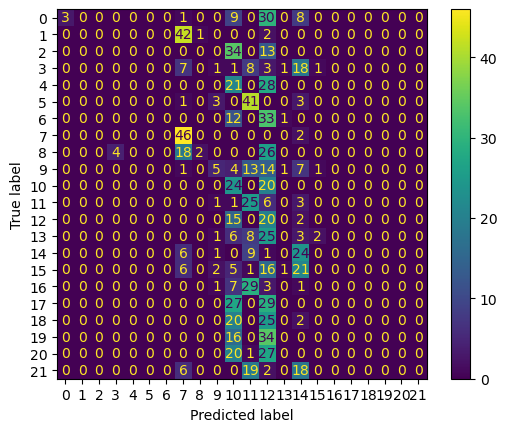

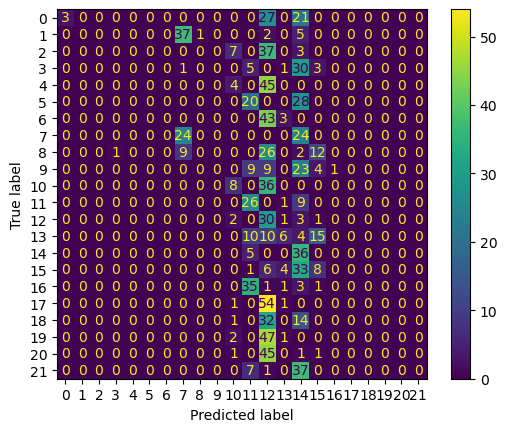

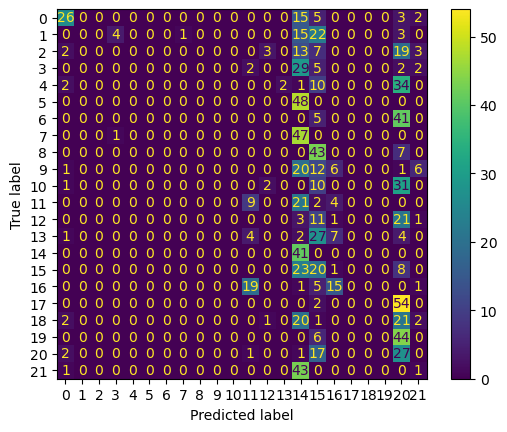

In [20]:
##Split by class, to increment by class:
class_to_group = {1:[1,2,3,4,5,6,7],2:[8,9],3:[10,11,12,13],4:[14,15,16],5:[17,18],6:[19],7:[20,21,22]}
X_train_merged, X_test_merged, y_train_merged, y_test_merged=loader.split_dataset_class(class_to_group,random_state=1)
memory_values = []

#Train model
for idx,(X_train,y_train,X_test,y_test) in enumerate(zip(X_train_merged,y_train_merged,X_test_merged,y_test_merged)):
    mem,res=model.partial_fit_train(X_train,y_train,classes=loader.classes)
    print(f"Score accuracy group {idx}: ",model.score(X_test,y_test))
    for i in range(idx+1):
        print(f"Score accuracy group learned {i}: ",model.score(X_test_merged[i],y_test_merged[i]))
    print("Score accuracy global: ",model.score(loader.X_test,loader.y_test))
    print("Memory: ",np.mean(mem),"MB")
    memory_values.append(np.mean(mem))
    
    y_pred=model.predict(loader.X_test)
    cm = confusion_matrix(loader.y_test, y_pred)
    ConfusionMatrixDisplay(confusion_matrix=cm).plot()

model.reset_model()

average_memory = np.mean(memory_values)
print("Average memory usage: ", average_memory,"MB")

Partial fit
Score accuracy batch 0:  0.274703557312253
Score accuracy global:  0.30632411067193677
Memory:  270.25859375 MB
Partial fit
Score accuracy batch 1:  0.4901185770750988
Score accuracy global:  0.5009881422924901
Memory:  272.1953125 MB
Partial fit
Score accuracy batch 2:  0.541501976284585
Score accuracy global:  0.5612648221343873
Memory:  273.10546875 MB
Partial fit
Score accuracy batch 3:  0.575098814229249
Score accuracy global:  0.5948616600790514
Memory:  258.66650390625 MB
Partial fit
Score accuracy batch 4:  0.6185770750988142
Score accuracy global:  0.6156126482213439
Memory:  260.93203125 MB
Partial fit
Score accuracy batch 5:  0.6185770750988142
Score accuracy global:  0.6195652173913043
Memory:  262.2265625 MB
Partial fit
Score accuracy batch 6:  0.6067193675889329
Score accuracy global:  0.650197628458498
Memory:  263.1875 MB
Partial fit
Score accuracy batch 7:  0.650197628458498
Score accuracy global:  0.6640316205533597
Memory:  264.26171875 MB
Partial fit
Sco

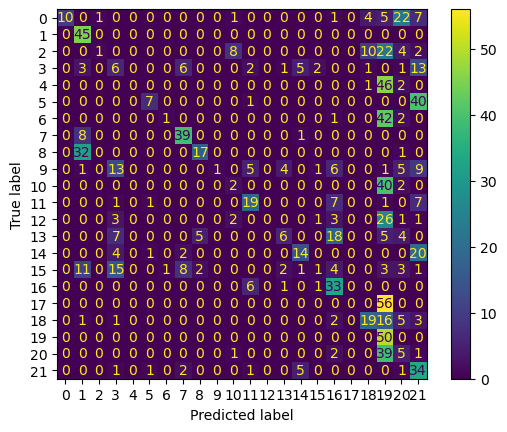

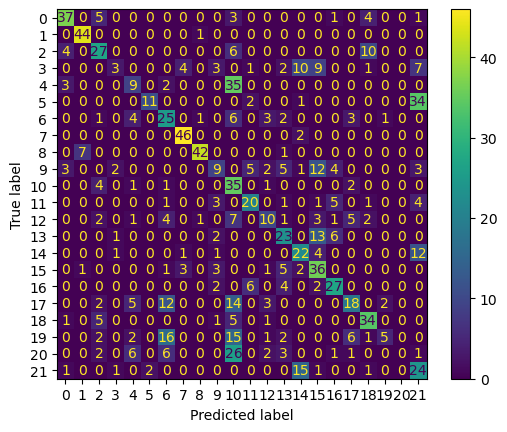

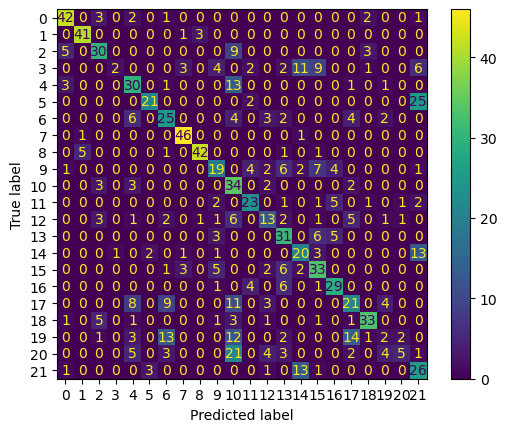

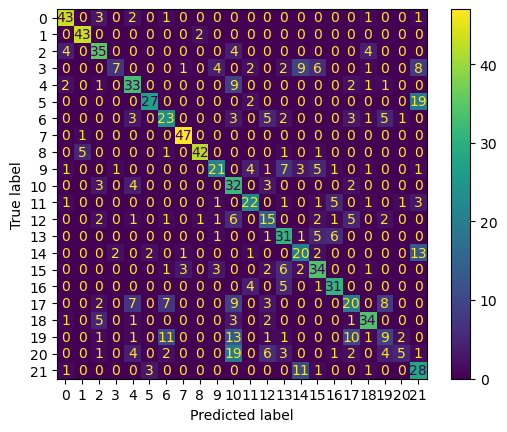

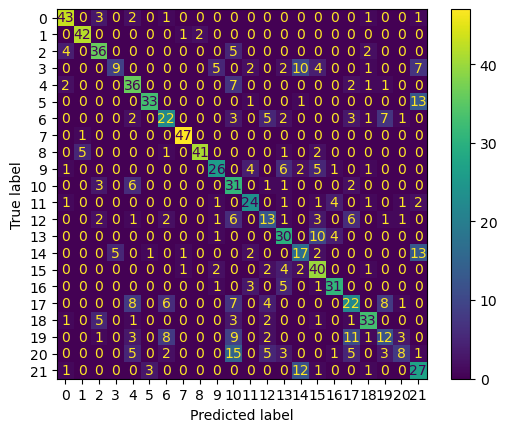

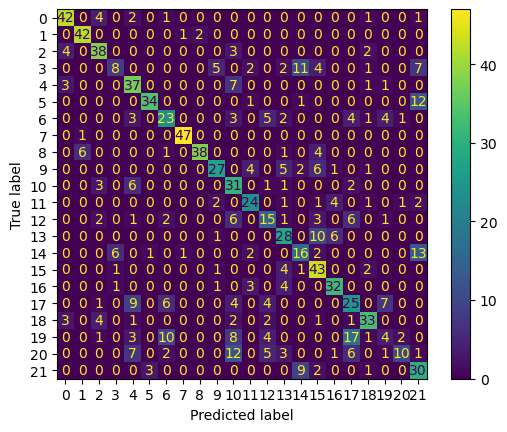

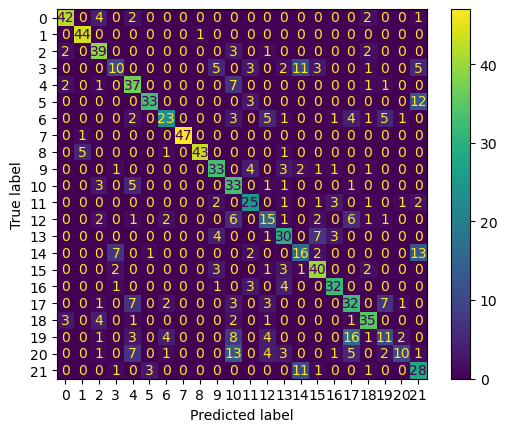

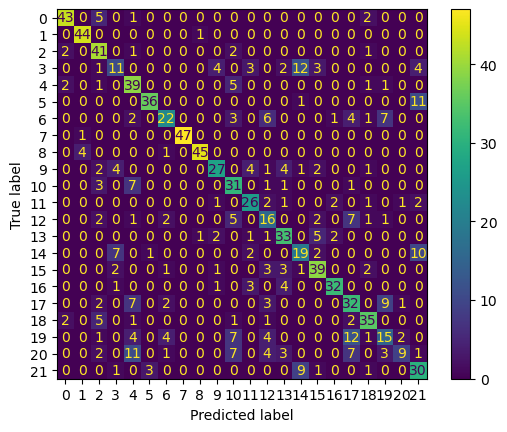

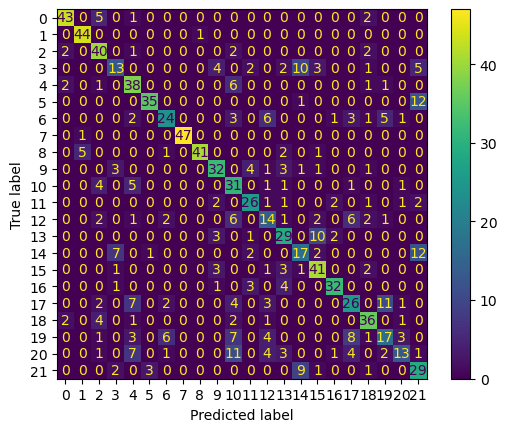

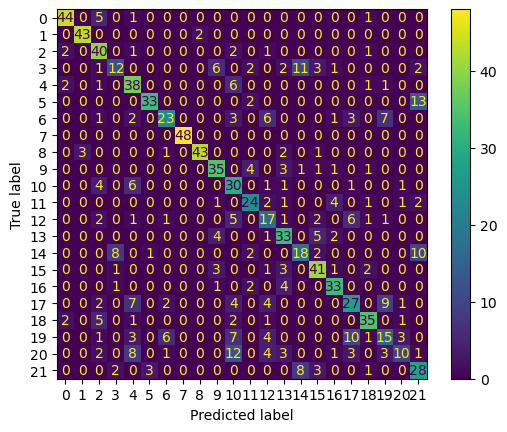

In [21]:
X_train_split_data,y_train_split_data,X_test_split_data,y_test_split_data=loader.split_dataset_data(10,random_state=1)
memory_values = []

for x in range(len(X_train_split_data)):
    mem,res=model.partial_fit_train(X_train_split_data[x],y_train_split_data[x],classes=loader.classes)
    print(f"Score accuracy batch {x}: ",model.score(X_test_split_data[x],y_test_split_data[x]))
    print("Score accuracy global: ",model.score(loader.X_test,loader.y_test))
    print("Memory: ",np.mean(mem),"MB")
    memory_values.append(np.mean(mem))

    y_pred=model.predict(loader.X_test)
    cm = confusion_matrix(loader.y_test, y_pred)
    ConfusionMatrixDisplay(confusion_matrix=cm).plot()

model.reset_model()

average_memory = np.mean(memory_values)
print("Average memory usage: ", average_memory,"MB")